## Get Data

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('../input/train_set.csv')
val_df = pd.read_csv ('../input/val_set.csv')
test_df = pd.read_csv('../input/test_set.csv')

In [3]:
print(f'Train Set Shape: {train_df.shape}')
print(f'Validation Set Shape: {val_df.shape}')
print(f'Test Set Shape: {test_df.shape}')

Train Set Shape: (6000, 7)
Validation Set Shape: (1000, 7)
Test Set Shape: (1000, 7)


## Prepare Data

### Tokenize and Create Padded Sequences

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# Specify Size of Vocabulary
vocab_size = 10000

tokenizer = Tokenizer(num_words=vocab_size)  
tokenizer.fit_on_texts(train_df['News Text'])  

In [8]:
print (len(tokenizer.word_index))

54970


In [9]:
train_sequences = tokenizer.texts_to_sequences(train_df['News Text'])
val_sequences = tokenizer.texts_to_sequences(val_df['News Text'])
test_sequences = tokenizer.texts_to_sequences(test_df['News Text'])

In [10]:
# specify max size of document
max_length = 100
# pad sequences
train_x = pad_sequences(train_sequences, maxlen=max_length, padding='post')
val_x = pad_sequences(val_sequences, maxlen=max_length, padding='post')
test_x = pad_sequences(test_sequences, maxlen=max_length, padding='post')

In [11]:
train_x.shape

(6000, 100)

In [12]:
val_x.shape

(1000, 100)

In [13]:
test_x.shape

(1000, 100)

### Get Label Data

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
train_y = encoder.fit_transform(train_df["Category"])
val_y = encoder.fit_transform(val_df["Category"])
test_y = encoder.transform (test_df["Category"])

In [16]:
print(f'train_y shape: {train_y.shape}')
print(f'val_y shape: {val_y.shape}')
print(f'test_y shape: {test_y.shape}')

train_y shape: (6000,)
val_y shape: (1000,)
test_y shape: (1000,)


# Model Training

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

### Function to Plot Losses

In [18]:
import matplotlib.pyplot as plt

def plot_losses(history):
    
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    epochs = range(len(train_loss))
    
    # Plot
    plt.plot(epochs, train_loss, label="Training Loss", color="blue")
    plt.plot(epochs, val_loss, label="Validation Loss", color="red")

    # Labels and legend
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()

### Early Stopping Callback

In [19]:
from keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,
    restore_best_weights=True
)

## Model 1

In [21]:
# create model
model_1 = Sequential()
model_1.add(Embedding(vocab_size, 8))
model_1.add(LSTM(4))
model_1.add(Dense(4, activation='sigmoid'))
model_1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [22]:
history_1 = model_1.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - acc: 0.3381 - loss: 1.3535 - val_acc: 0.5840 - val_loss: 1.0971
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.5553 - loss: 1.0370 - val_acc: 0.6150 - val_loss: 0.9331
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.7142 - loss: 0.8016 - val_acc: 0.8930 - val_loss: 0.5580
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9085 - loss: 0.4747 - val_acc: 0.9050 - val_loss: 0.4142
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9429 - loss: 0.2923 - val_acc: 0.9080 - val_loss: 0.3884
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9496 - loss: 0.2363 - val_acc: 0.9120 - val_loss: 0.3793
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9562 - loss: 0.2127 - val_acc: 0.9050 - val_loss: 0.3935
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9631 - loss: 0.1796 - val_acc: 0.9090 - val_loss: 0.3801
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms

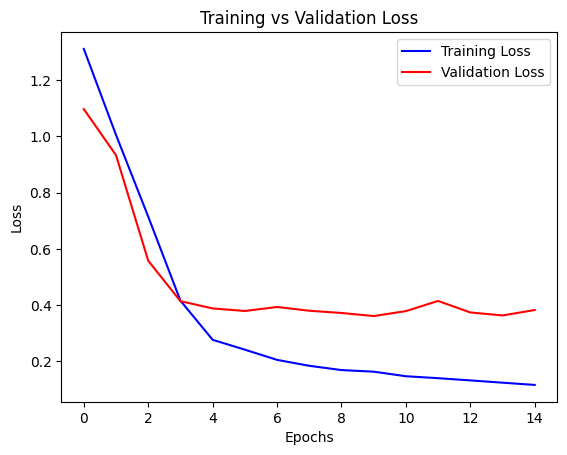

In [23]:
plot_losses(history_1)

### Conclusion: Need to train for more epochs to decide the point where model stops improving

## Model 2

### Increase Epochs

In [25]:
# create model
model_2 = Sequential()
model_2.add(Embedding(vocab_size, 8))
model_2.add(LSTM(4))
model_2.add(Dense(4, activation='sigmoid'))
model_2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [26]:
history_2 = model_2.fit(train_x, train_y, epochs=30, batch_size=8, validation_data=(val_x, val_y))

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - acc: 0.3156 - loss: 1.3662 - val_acc: 0.5250 - val_loss: 1.1337
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.5567 - loss: 1.0761 - val_acc: 0.7310 - val_loss: 0.7888
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.7533 - loss: 0.7428 - val_acc: 0.7450 - val_loss: 0.6686
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.7721 - loss: 0.6243 - val_acc: 0.7800 - val_loss: 0.5755
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.8156 - loss: 0.5267 - val_acc: 0.8010 - val_loss: 0.6277
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.8697 - loss: 0.4253 - val_acc: 0.9130 - val_loss: 0.3450
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9371 - loss: 0.2569 - val_acc: 0.9160 - val_loss: 0.3308
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9504 - loss: 0.2069 - val_acc: 0.9070 - val_loss: 0.3605
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms

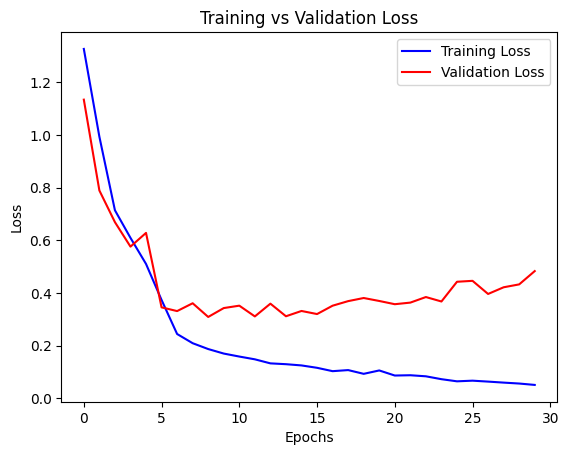

In [27]:
plot_losses(history_2)

### Conclusion: Increaing epochs does not affect model performance. Model optimises validation loss within 15 epochs. Begins overfitting afterwards.

## Model 3

### Increase Nodes

In [28]:
# create model
model_3 = Sequential()
model_3.add(Embedding(vocab_size, 8))
model_3.add(LSTM(8))
model_3.add(Dense(4, activation='sigmoid'))
model_3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [29]:
history_3 = model_3.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - acc: 0.3834 - loss: 1.2642 - val_acc: 0.5920 - val_loss: 0.9287
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.7297 - loss: 0.7830 - val_acc: 0.8240 - val_loss: 0.5866
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.8771 - loss: 0.5093 - val_acc: 0.8790 - val_loss: 0.4539
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - acc: 0.9265 - loss: 0.3284 - val_acc: 0.8740 - val_loss: 0.4442
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.9418 - loss: 0.2656 - val_acc: 0.9140 - val_loss: 0.3521
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - acc: 0.9516 - loss: 0.2331 - val_acc: 0.9010 - val_loss: 0.3666
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.9513 - loss: 0.2193 - val_acc: 0.9090 - val_loss: 0.3659
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.9616 - loss: 0.1716 - val_acc: 0.9150 - val_loss: 0.3185
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1

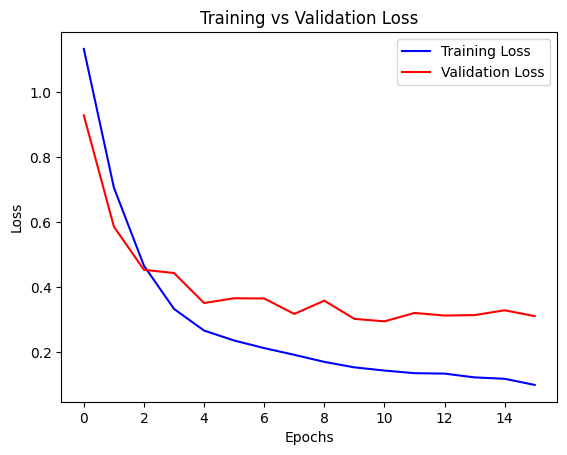

In [30]:
plot_losses(history_3)

### Conclusion: Increasing Nodes from 4 to 8 gives us a slightly better validation loss (0.2956) compared to training with 4 Nodes (0.3085)

## Model 4

### Increase Nodes

In [34]:
# create model
model_4 = Sequential()
model_4.add(Embedding(vocab_size, 8))
model_4.add(LSTM(16))
model_4.add(Dense(4, activation='sigmoid'))
model_4.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [35]:
history_4 = model_4.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.3839 - loss: 1.2268 - val_acc: 0.6360 - val_loss: 0.7973
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.7125 - loss: 0.6161 - val_acc: 0.8580 - val_loss: 0.4984
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - acc: 0.8917 - loss: 0.4196 - val_acc: 0.9110 - val_loss: 0.3554
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.9394 - loss: 0.2585 - val_acc: 0.9170 - val_loss: 0.3405
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.9484 - loss: 0.2146 - val_acc: 0.9060 - val_loss: 0.3602
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - acc: 0.9525 - loss: 0.1718 - val_acc: 0.9110 - val_loss: 0.3513
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - acc: 0.9654 - loss: 0.1422 - val_acc: 0.9210 - val_loss: 0.3403
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.9682 - loss: 0.1347 - val_acc: 0.9170 - val_loss: 0.3487
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

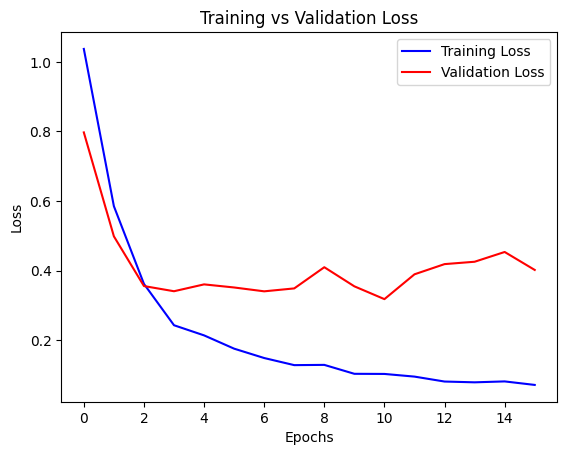

In [36]:
plot_losses(history_4)

### Conclusion: Increasing Nodes to 16 decreases performance, possibly because the model becomes too complex and overfits to the data

## Model 5

### Add Layer

In [37]:
# create model
model_5 = Sequential()
model_5.add(Embedding(vocab_size, 8))
model_5.add(LSTM(8, return_sequences=True))
model_5.add(LSTM(4))
model_5.add(Dense(4, activation='sigmoid'))
model_5.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [38]:
history_5 = model_5.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - acc: 0.4626 - loss: 1.1399 - val_acc: 0.6840 - val_loss: 0.7665
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - acc: 0.6869 - loss: 0.7053 - val_acc: 0.6580 - val_loss: 0.7351
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - acc: 0.6712 - loss: 0.6925 - val_acc: 0.6610 - val_loss: 0.7584
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - acc: 0.6986 - loss: 0.6557 - val_acc: 0.7190 - val_loss: 0.6863
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - acc: 0.7708 - loss: 0.6238 - val_acc: 0.9000 - val_loss: 0.4887
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - acc: 0.9261 - loss: 0.3760 - val_acc: 0.8930 - val_loss: 0.4205
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - acc: 0.9382 - loss: 0.2982 - val_acc: 0.8960 - val_loss: 0.4112
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - acc: 0.9547 - loss: 0.2154 - val_acc: 0.9100 - val_loss: 0.3604
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

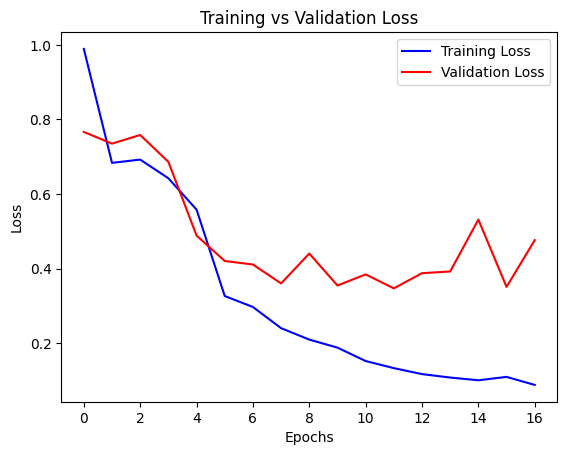

In [39]:
plot_losses(history_5)

### Conclusion: Adding a layer decreases performance, owing to overfitting on the training data

## Model 6

### Increase Embedding Size

In [43]:
# create model
model_6 = Sequential()
model_6.add(Embedding(vocab_size, 16))
model_6.add(LSTM(8))
model_6.add(Dense(4, activation='sigmoid'))
model_6.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [44]:
history_6 = model_6.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.3874 - loss: 1.2679 - val_acc: 0.5010 - val_loss: 1.0146
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.5233 - loss: 1.0044 - val_acc: 0.7450 - val_loss: 0.7533
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.7963 - loss: 0.6391 - val_acc: 0.8640 - val_loss: 0.5143
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.9244 - loss: 0.3423 - val_acc: 0.9050 - val_loss: 0.3943
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.9467 - loss: 0.2577 - val_acc: 0.9180 - val_loss: 0.3485
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.9505 - loss: 0.2358 - val_acc: 0.9120 - val_loss: 0.3823
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.9602 - loss: 0.1902 - val_acc: 0.9160 - val_loss: 0.3734
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.9614 - loss: 0.1889 - val_acc: 0.9130 - val_loss: 0.3399
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/

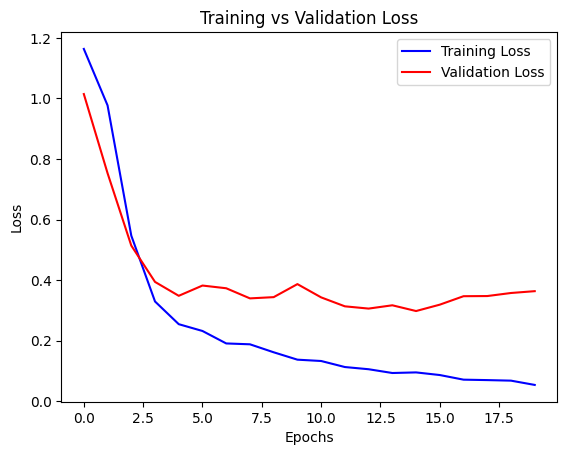

In [45]:
plot_losses(history_6)

### Conclusion: Increasing embedding size from 8 to 16 does not reduce validation loss. However, it does bring an improvement to validation accuracy, from 92.1 to 93.4.

## Model 7

### Increase Embedding Size

In [48]:
# create model
model_7 = Sequential()
model_7.add(Embedding(vocab_size, 32))
model_7.add(LSTM(8))
model_7.add(Dense(4, activation='sigmoid'))
model_7.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [49]:
history_7 = model_7.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - acc: 0.4574 - loss: 1.1600 - val_acc: 0.7020 - val_loss: 0.7111
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.7219 - loss: 0.6652 - val_acc: 0.7940 - val_loss: 0.5872
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.8877 - loss: 0.4422 - val_acc: 0.9100 - val_loss: 0.3401
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.9526 - loss: 0.2123 - val_acc: 0.9090 - val_loss: 0.3787
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.9541 - loss: 0.1946 - val_acc: 0.9180 - val_loss: 0.2940
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.9636 - loss: 0.1570 - val_acc: 0.9100 - val_loss: 0.3403
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9718 - loss: 0.1345 - val_acc: 0.9100 - val_loss: 0.3274
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - acc: 0.9725 - loss: 0.1318 - val_acc: 0.9220 - val_loss: 0.3491
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12m

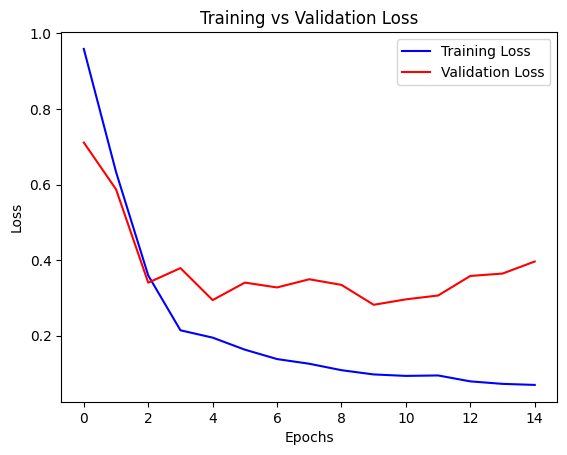

In [50]:
plot_losses(history_7)

### Conclusion: Increasing Embedding Size from 16 to 32 brings a very slight improvement in validation loss (from 0.2956 to 0.2815)

## Model 8

### Add Dropout

In [52]:
from keras.layers import Dropout

In [53]:
# create model
model_8 = Sequential()
model_8.add(Embedding(vocab_size, 32))
model_8.add(LSTM(8))
# drop out 10% of neurons
model_8.add(Dropout(0.1))
model_8.add(Dense(4, activation='sigmoid'))
model_8.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [54]:
history_8 = model_8.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.4212 - loss: 1.2267 - val_acc: 0.7020 - val_loss: 0.7138
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.7115 - loss: 0.6542 - val_acc: 0.7430 - val_loss: 0.6085
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.7791 - loss: 0.5179 - val_acc: 0.8030 - val_loss: 0.5311
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.8614 - loss: 0.4250 - val_acc: 0.8990 - val_loss: 0.4130
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9478 - loss: 0.2489 - val_acc: 0.9160 - val_loss: 0.3539
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9628 - loss: 0.1951 - val_acc: 0.9290 - val_loss: 0.3191
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9736 - loss: 0.1456 - val_acc: 0.9240 - val_loss: 0.3520
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.9724 - loss: 0.1309 - val_acc: 0.9250 - val_loss: 0.3395
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/

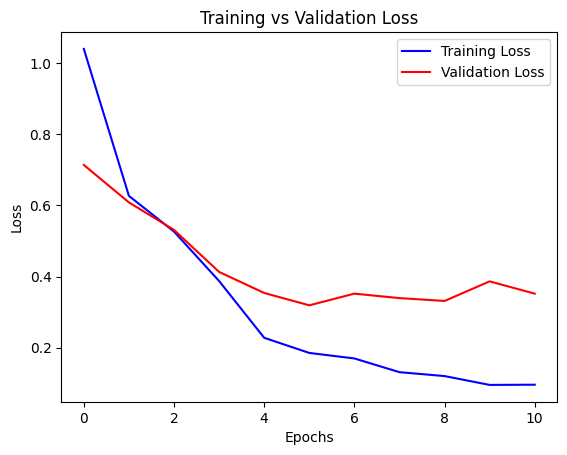

In [55]:
plot_losses(history_8)

### Conclusion: Dropout reduces performance (both validation loss and validation accruacy)

## Model 9

### Add L2 Regularisation

In [56]:
from keras.regularizers import l2

In [66]:
# create model
model_9 = Sequential()
model_9.add(Embedding(vocab_size, 32))
model_9.add(LSTM(8, kernel_regularizer=l2(0.001)))
model_9.add(Dense(4, activation='sigmoid'))
model_9.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [67]:
history_9 = model_9.fit(train_x, train_y, epochs=20, batch_size=8, validation_data=(val_x, val_y), callbacks=early_stopping)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - acc: 0.4555 - loss: 1.2198 - val_acc: 0.7070 - val_loss: 0.7013
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - acc: 0.7748 - loss: 0.6269 - val_acc: 0.9060 - val_loss: 0.4536
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - acc: 0.9306 - loss: 0.3555 - val_acc: 0.9110 - val_loss: 0.3757
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - acc: 0.9474 - loss: 0.2607 - val_acc: 0.9200 - val_loss: 0.3374
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.9560 - loss: 0.2041 - val_acc: 0.9250 - val_loss: 0.3297
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.9614 - loss: 0.1910 - val_acc: 0.9040 - val_loss: 0.4144
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.9579 - loss: 0.1933 - val_acc: 0.9080 - val_loss: 0.3720
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.9709 - loss: 0.1306 - val_acc: 0.9330 - val_loss: 0.3101
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1

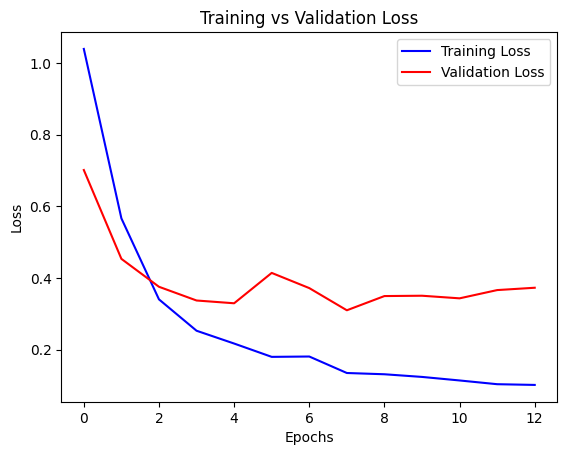

In [68]:
plot_losses(history_9)

### Conclusion: Regularisation, even with a small value (0.001), impairs performance

# Get Metrics on Test Set

In [69]:
from sklearn.metrics import classification_report, accuracy_score

In [70]:
y_pred = model_7.predict(test_x)

# Get Label with highest probability
y_pred = y_pred.argmax(axis=1)  

# Generate classification report
report = classification_report(test_y, y_pred, digits=4)  
accuracy = accuracy_score(test_y, y_pred)  

print(report)
print(f"Accuracy: {accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0     0.9449    0.9600    0.9524       250
           1     0.9407    0.8880    0.9136       250
           2     0.9400    0.9400    0.9400       250
           3     0.9385    0.9760    0.9569       250

    accuracy                         0.9410      1000
   macro avg     0.9410    0.9410    0.9407      1000
weighted avg     0.9410    0.9410    0.9407      1000

Accuracy: 0.9410
